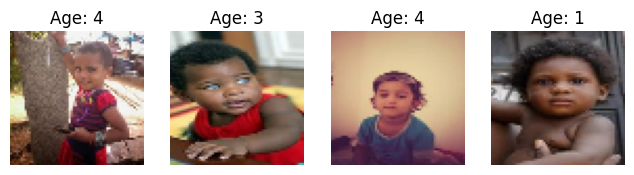

Data preprocessing and saving complete!


In [4]:
# -*- coding: utf-8 -*-
"""
Created on ... 

@author: ...
"""

# Import necessary libraries
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --- Data Loading and Preprocessing ---

def load_data(data_dir, img_size=(64, 64)):
  """Loads and preprocesses images from the UTKFace dataset."""
  images = []
  ages = []

  for filename in os.listdir(data_dir):
    if filename.endswith(".jpg"):
      img_path = os.path.join(data_dir, filename)
      img = cv2.imread(img_path)
      img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
      img = cv2.resize(img, img_size)
      images.append(img)

      age = int(filename.split("_")[0])
      ages.append(age)

  return np.array(images), np.array(ages)

# Set data directory paths
data_dir = "../data/raw/UTKFace"  # Adjust if necessary
save_dir = "../data/processed"

# Load the data
images, ages = load_data(data_dir)

# --- Data Exploration (Optional) ---

# Display some sample images and their labels
plt.figure(figsize=(10, 5))
for i in range(len(images)):  # Loop only up to the length of images
  plt.subplot(2, 5, i + 1)
  plt.imshow(images[i])
  plt.title(f"Age: {ages[i]}")
  plt.axis('off')
plt.show()

# --- Data Splitting ---

X_train, X_test, y_train, y_test = train_test_split(images, ages, test_size=0.2, random_state=42)

# --- Data Normalization ---

X_train = X_train / 255.0
X_test = X_test / 255.0

# --- Data Saving ---

np.save(os.path.join(save_dir, 'X_train.npy'), X_train)
np.save(os.path.join(save_dir, 'X_test.npy'), X_test)
np.save(os.path.join(save_dir, 'y_train.npy'), y_train)
np.save(os.path.join(save_dir, 'y_test.npy'), y_test)

print("Data preprocessing and saving complete!")
